In [2]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class PureQuine(nn.Module):
    def __init__(self, layer_sizes=[16,128,128,1]):
        super(PureQuine, self).__init__()
        self.layer_sizes = layer_sizes
        self.layers = nn.ModuleList([nn.Linear(layer_sizes[i], layer_sizes[i+1]) for i in range(len(layer_sizes)-1)])
        max_binary_size = max(max(layer_sizes), len(layer_sizes)-1)
        binary_reps = []
        for i in range(max_binary_size):
            l = []
            x = i
            for _ in range(int(np.ceil(np.log2(max_binary_size)))):
                l.append((x % 2) * 2 - 1)
                x = x//2
            binary_reps.append(l)
        dataset = []
        for layer_number in range(len(layer_sizes)-1):
            for input_index in range(layer_sizes[layer_number]):
                for output_index in range(layer_sizes[layer_number+1]):
                    datapoint = binary_reps[layer_number][:int(np.ceil(np.log2(len(layer_sizes)-1)))] + binary_reps[input_index] + binary_reps[output_index]
                    dataset.append(datapoint)
        self.X = torch.FloatTensor(dataset)
    
    def forward(self, x):
        for i in range(len(self.layers)-1):
            x = torch.nn.functional.relu(self.layers[i](x))
        x = self.layers[-1](x)
        return x
    
    def regenerate(self, shift = 1):
        out = self(self.X)/10000 - shift
        print(out)
        new_weights = out.split([self.layer_sizes[i]*self.layer_sizes[i+1] for i in range(len(self.layer_sizes)-1)])
        new_weights = [new_weights[i].view(self.layer_sizes[i+1], self.layer_sizes[i]).detach() for i in range(len(self.layer_sizes)-1)]
        for i in range(len(self.layers)):
            self.layers[i].weight = torch.nn.Parameter(new_weights[i])
        

In [4]:
layer_sizes = [16, 128, 128, 128, 1]

In [20]:
network = PureQuine(layer_sizes = layer_sizes)

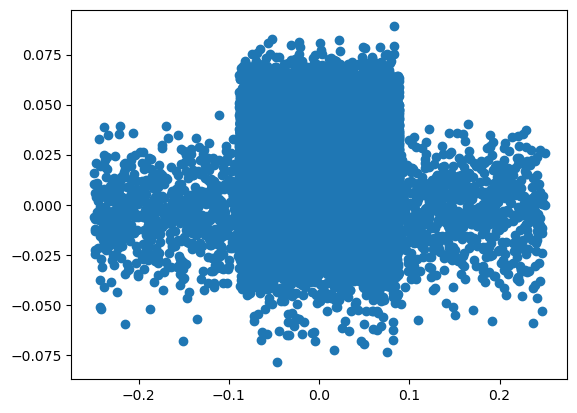

In [25]:
plt.scatter(torch.cat([layer.weight.view(-1) for layer in network.layers]).detach(), network(network.X).view(-1).detach(),)

In [22]:
torch.cat([layer.weight.view(-1) for layer in network.layers]).detach()

tensor([-0.0147, -0.1786, -0.0118,  ...,  0.0727, -0.0224, -0.0588])

tensor([[0.0500],
        [0.0500],
        [0.0500],
        ...,
        [0.0500],
        [0.0500],
        [0.0500]], grad_fn=<SubBackward0>)


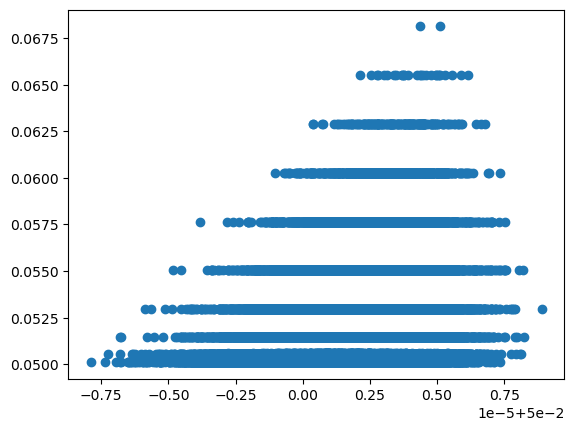

In [26]:
network.regenerate(shift = -0.05)
plt.scatter(torch.cat([layer.weight.view(-1) for layer in network.layers]).detach(), (network(network.X)/10000 + .05).view(-1).detach())

tensor([[0.0500],
        [0.0500],
        [0.0500],
        ...,
        [0.0500],
        [0.0500],
        [0.0500]], grad_fn=<SubBackward0>)
tensor([[0.0501],
        [0.0501],
        [0.0501],
        ...,
        [0.0517],
        [0.0517],
        [0.0534]], grad_fn=<SubBackward0>)
tensor([[0.0501],
        [0.0501],
        [0.0501],
        ...,
        [0.0519],
        [0.0519],
        [0.0537]], grad_fn=<SubBackward0>)
tensor([[0.0501],
        [0.0501],
        [0.0501],
        ...,
        [0.0519],
        [0.0519],
        [0.0538]], grad_fn=<SubBackward0>)
tensor([[0.0501],
        [0.0501],
        [0.0501],
        ...,
        [0.0519],
        [0.0519],
        [0.0538]], grad_fn=<SubBackward0>)
tensor([[0.0501],
        [0.0501],
        [0.0501],
        ...,
        [0.0519],
        [0.0519],
        [0.0538]], grad_fn=<SubBackward0>)
tensor([[0.0501],
        [0.0501],
        [0.0501],
        ...,
        [0.0519],
        [0.0519],
        [0.0538]], gr

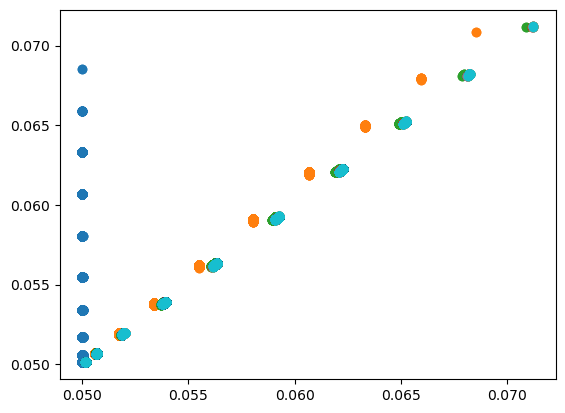

In [14]:
network = PureQuine(layer_sizes = layer_sizes)
for i in range(10):
    network.regenerate(shift = -0.05)
    plt.scatter(torch.cat([layer.weight.view(-1) for layer in network.layers]).detach(), (network(network.X)/10000 + .05).detach())

In [15]:
network(network.X).view(-1)/10000 + .05

tensor([0.0501, 0.0501, 0.0501,  ..., 0.0519, 0.0519, 0.0538],
       grad_fn=<AddBackward0>)

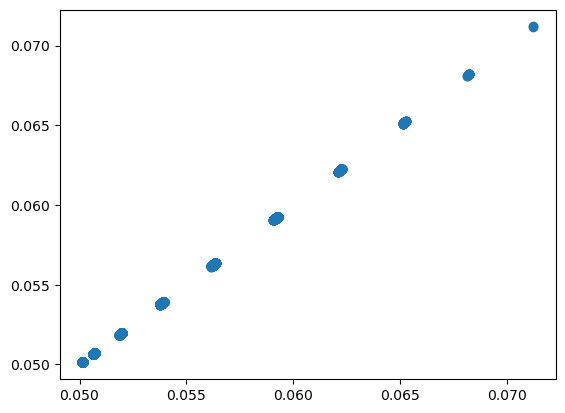

In [16]:
plt.scatter(torch.cat([layer.weight.view(-1) for layer in network.layers]).detach(), (network(network.X)/10000 + .05).view(-1).detach())

In [28]:
max_binary_size = max(max(layer_sizes), len(layer_sizes)-1)

In [29]:
np.ceil(np.log2(len(layer_sizes)-1))

2.0

In [24]:
max_binary_size

128

In [33]:
binary_reps = []
for i in range(max_binary_size):
    l = []
    x = i
    for _ in range(int(np.ceil(np.log2(max_binary_size)))):
        l.append(x % 2)
        x = x//2
    binary_reps.append(l)

In [39]:
dataset = []
for layer_number in range(len(layer_sizes)-1):
    for input_index in range(layer_sizes[layer_number]):
        for output_index in range(layer_sizes[layer_number+1]):
            datapoint = binary_reps[layer_number][:int(np.ceil(np.log2(len(layer_sizes)-1)))] + binary_reps[input_index] + binary_reps[output_index]
            dataset.append(datapoint)
X = torch.FloatTensor(dataset)
X[-1]
    

tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [60]:
layer_shapes = [layer.weight.shape for layer in network.layers]

In [53]:
out = network(X)

In [72]:
new_weights = out.split([layer_sizes[i]*layer_sizes[i+1] for i in range(len(layer_sizes)-1)])
new_weights = [new_weights[i].view(layer_sizes[i], layer_sizes[i+1]).detach() for i in range(len(layer_sizes)-1)]

[tensor([[-0.0149, -0.0115,  0.0100,  ..., -0.0306, -0.0483, -0.0263],
         [-0.0258, -0.0246, -0.0012,  ..., -0.0322, -0.0568, -0.0313],
         [-0.0082, -0.0239,  0.0151,  ..., -0.0480, -0.0576, -0.0268],
         ...,
         [-0.0260, -0.0077,  0.0080,  ..., -0.0392, -0.0459, -0.0621],
         [-0.0125, -0.0073,  0.0311,  ..., -0.0435, -0.0479, -0.0147],
         [-0.0327, -0.0178, -0.0014,  ..., -0.0639, -0.0707, -0.0350]]),
 tensor([[-0.0098, -0.0079,  0.0026,  ..., -0.0253, -0.0534, -0.0275],
         [-0.0020, -0.0145,  0.0145,  ..., -0.0301, -0.0596, -0.0255],
         [ 0.0018, -0.0108,  0.0170,  ..., -0.0441, -0.0533, -0.0274],
         ...,
         [-0.0066,  0.0096,  0.0130,  ..., -0.0737, -0.0855, -0.0323],
         [-0.0290, -0.0075, -0.0099,  ..., -0.0976, -0.0988, -0.0509],
         [ 0.0097,  0.0112,  0.0172,  ..., -0.0211, -0.0440, -0.0188]]),
 tensor([[-0.0235],
         [-0.0433],
         [-0.0220],
         [-0.0327],
         [-0.0159],
         [-0.036

In [77]:
for i in range(len(network.layers)):
    network.layers[i].weight = torch.nn.Parameter(new_weights[i])

In [64]:
layer_shapes[0]

TypeError: multiply() received an invalid combination of arguments - got (torch.Size), but expected one of:
 * (Tensor input, Tensor other, *, Tensor out)
 * (Tensor input, Number other)
